In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 5s 0us/step


In [3]:
# Reshape the dataset to fit the model
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [5]:
train_images

(60000, 28, 28, 1)

In [6]:
# Normalize the pixel values from a scale out of 255 to a scale out of 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [9]:
# Build the CNN model
model = Sequential()

In [10]:
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1652 - accuracy: 0.9506 - val_loss: 0.0611 - val_accuracy: 0.9801
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0479 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0427 - accuracy: 0.9868 - val_loss: 0.0449 - val_accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0342 - accuracy: 0.9897 - val_loss: 0.0415 - val_accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0280 - accuracy: 0.9911 - val_loss: 0.0367 - val_accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.0321 - val_accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0319 -

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 [==============================] - 4s 11ms/step - loss: 0.0383 - accuracy: 0.9890
Test Accuracy: 98.90%


In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [15]:
# Get the model's predictions for the test data
predicted_classes = model.predict(test_images)
predicted_labels = np.argmax(predicted_classes, axis=1)
true_labels = np.argmax(test_labels, axis=1)

313/313 [==============================] - 3s 9ms/step


In [16]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

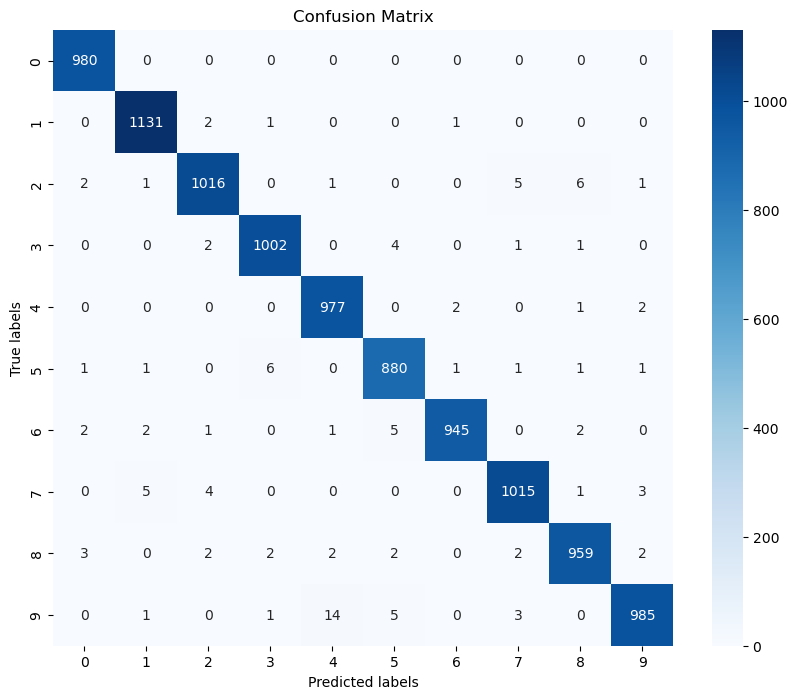

In [17]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Train the model and capture the history
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.0401 - val_accuracy: 0.9895
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0490 - val_accuracy: 0.9886
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0076 - accuracy: 0.9973 - val_loss: 0.0457 - val_accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0472 - val_accuracy: 0.9884
Epoch 5/5
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0452 - val_accuracy: 0.9889


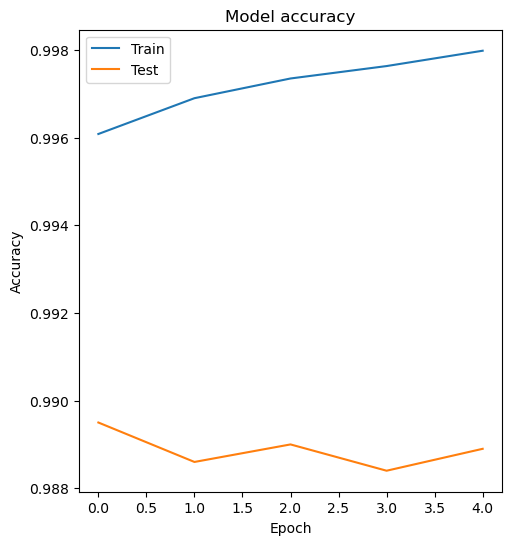

In [19]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

C:\Users\Syed Asad\AppData\Local\Temp\ipykernel_13372\3207018467.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i+1)


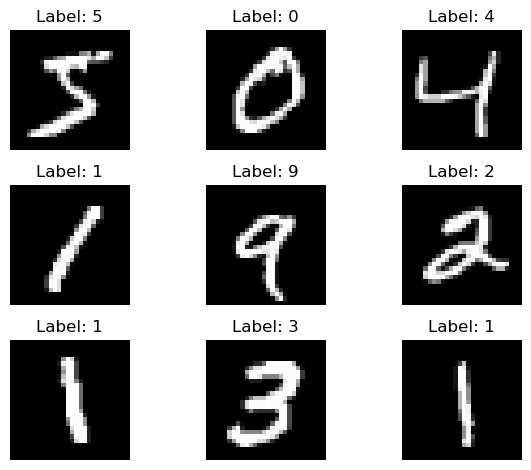

In [20]:
# Display some of the original images
plt.subplot(1, 2, 2)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(train_labels[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()

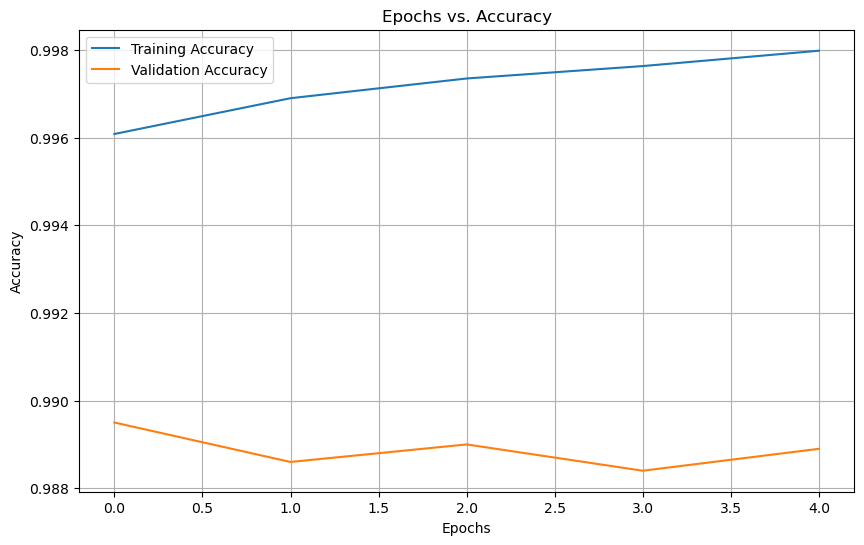

In [21]:
# Plotting the epoch vs accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epochs vs. Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()